In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import moment

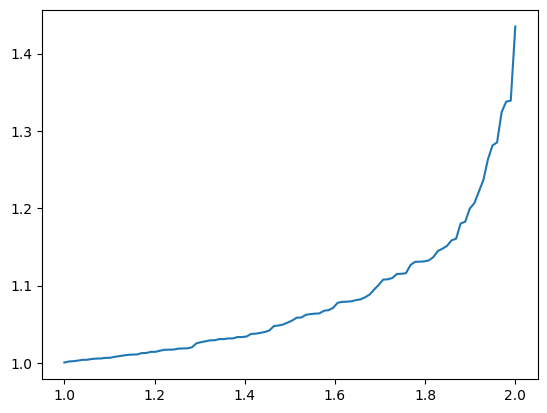

In [2]:
def func1(x, tetha):
    return (1 - x) ** (1 / (1 - tetha))

N = 100
tetha = 13
a = 0.05 #p-value uraaaaaaaaa

np.random.seed(42)
X = [func1(x, tetha) for x in np.random.sample(N)]
X.sort()
x = np.linspace(1, 2, 100)
plt.plot(x, X)
plt.show()

In [8]:
tetha_estimate = N / np.sum(np.log(X)) + 1
print("ОМП: Tetha estimate = ", round(tetha_estimate, 3))

right = round((1.96 * np.log(2) * (2 ** (1 / (tetha_estimate - 1)))) / (tetha_estimate - 1) / 10 + 2 ** (1 / (tetha_estimate -1)), 3)
left = round((-(1.96 * np.log(2) * (2 ** (1 / (tetha_estimate - 1)))) / (tetha_estimate - 1) / 10 + 2 ** (1 / (tetha_estimate -1))), 3)
print("Доверительный размах для медианы: [", left, ', ', right, ']')
print("Размах = ", round(right - left, 3))

ОМП: Tetha estimate =  14.118
Доверительный размах для медианы: [ 1.043 ,  1.065 ]
Размах =  0.022


In [9]:
left0 = round(-1.96 * (tetha_estimate - 1) / np.sqrt(N) + tetha_estimate, 3)
right0 = round(1.96 * (tetha_estimate - 1) / np.sqrt(N) + tetha_estimate, 3)

print("Асимптотический доверительный интервал: [", left0, ', ', right0, ']')
print("Размах = ", round(right0 - left0, 3))

Асимптотический доверительный интервал: [ 11.547 ,  16.69 ]
Размах =  5.143


In [10]:
def func2(X, N):
    return 1 + N / sum([np.log(x) for x in X])

M = np.sort(np.array([func2([func1(x, tetha) for x in np.random.sample(N)], N) for i in range(50000)]))

left2 = round(M[int(a / 2 * 50000)], 3)
right2 = round(M[int((1 - a / 2) * 50000)], 3)

print("Бутстраповский параметрический интервал: [", left2, ', ', right2, ']')
print("Размах = ", round(right2 - left2, 3))

Бутстраповский параметрический интервал: [ 10.979 ,  15.708 ]
Размах =  4.729


In [6]:
M = np.array([])
for i in range(1000):
    M = np.append(M, N / np.sum(np.log((np.random.choice(X, size = len(X))))) + 1 - tetha_estimate)

M = np.sort(M)

left3 = round(tetha_estimate + M[74], 3)
right3 = tetha_estimate + M[974]

print("Бутрстраповский непараметрический интервал: [", left3, ', ', right3, ']')
print("Размах = ", left3, ', ', right3, ']')

Бутрстраповский непараметрический интервал: [ 12.517401078487097 ,  17.283897101337644 ]
Размах =  12.517401078487097 ,  17.283897101337644 ]


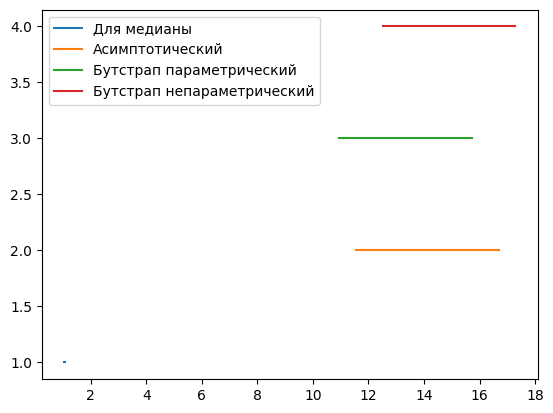

In [7]:

x1 = np.linspace(left, right, 100)
y1 = [1] * 100

x2 = np.linspace(left0, right0, 100)
y2 = [2] * 100

x3 = np.linspace(left2, right2, 100)
y3 = [3] * 100

x4 = np.linspace(left3, right3, 100)
y4 = [4] * 100

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)

plt.legend(["Для медианы", "Асимптотический", "Бутстрап параметрический", "Бутстрап непараметрический"])
